* survived: 생존 여부를 나타내며, 0은 사망, 1은 생존을 의미합니다.
* pclass: 티켓 클래스를 나타내며, 1은 1등석, 2는 2등석, 3은 3등석을 의미합니 다.
* name: 승객의 이름입니다.
* sex: 승객의 성별을 나타냅니다.
* age: 승객의 나이입니다. 일부는 추정치일 수 있습니다.
* sibsp: 함께 탑승한 형제자매 또는 배우자의 수입니다.
* parch: 함께 탑승한 부모 또는 자녀의 수입니다.
* ticket: 티켓 번호입니다.
* fare: 티켓 요금입니다.
* cabin: 객실 번호입니다. 많은 값이 누락되어 있습니다.
* embarked: 승선한 항구를 나타냅니다. C는 셰르부르, Q는 퀸즈타운, S는 사우샘프턴입니다.
* boat: 탈출에 사용된 보트 번호입니다. 이 컬럼은 일부 데이터셋에만 포함되어 있습니다.
* body: 사망자의 시신 번호입니다. 이 컬럼은 일부 데이터셋에만 포함되어 있으며, 많은 경우 누락됩니다.
* home.dest: 승객의 집 주소 및 목적지입니다. 이 컬럼은 일부 데이터셋에만 포함되어 있습니다.
* deck: 객실이 위치한 데크(갑판)를 나타내며, 일부 확장된 데이터셋에만 포함된 정보입니다.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# 폰트설정
plt.rc("font", family='Malgun Gothic')

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

## 데이터 확인

In [6]:
titanic = sns.load_dataset('titanic')

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 생존자와 사망자 수

In [9]:
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [10]:
titanic['survived'].value_counts(normalize=True)*100

survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

### 클래스별 승객 수

In [11]:
titanic['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [12]:
titanic['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

### 성별 생존율

In [13]:
titanic.groupby('sex')['survived'].mean()*100

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

### 나이분포

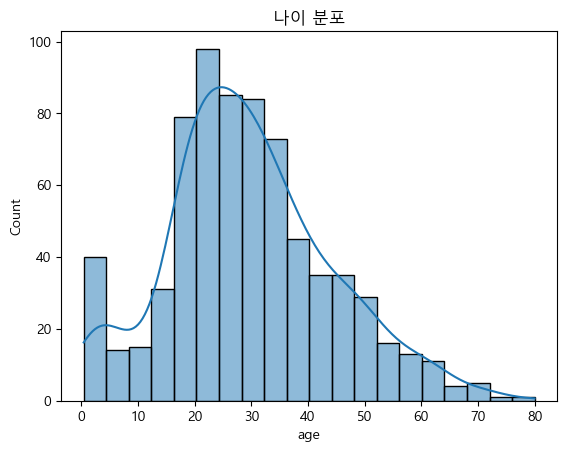

In [16]:
sns.histplot(titanic['age'], bins=20, kde=True)
plt.title('나이 분포')
plt.show()

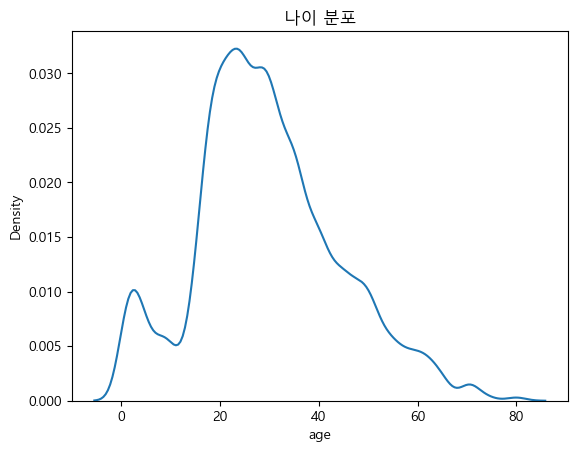

In [20]:
# 케이텐스 플롯
# bw_adjust : 수치가 적을수록 거칠게, 클수록 완만하게 표현
sns.kdeplot(titanic['age'], bw_adjust=0.5)
plt.title('나이 분포')
plt.show()

### 클래스별 평균 운임

In [21]:
titanic.groupby('class')['fare'].mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

### 승객나이의 중앙값과 평균

In [22]:
titanic['age'].mean()

29.69911764705882

In [23]:
titanic['age'].median()

28.0

### 가장 높은 움임을 낸 승객 정보

In [24]:
titanic[titanic['fare'] == titanic['fare'].max()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


## 그래프

### 막대 그래프   

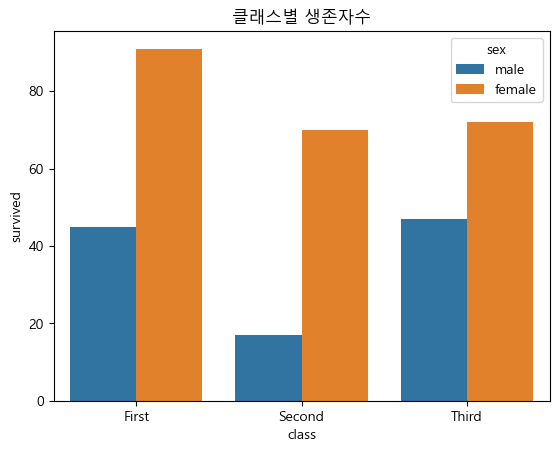

In [88]:
# 각 클래스별 생존자 수
sns.barplot(data=titanic, x='class', y='survived', estimator='sum', errorbar=None, hue='sex')
plt.title('클래스별 생존자수')
plt.show()

### 산점도 그래프

In [32]:
# 나이와 운임간의 관계 표현
titanic[['age', 'fare']].corr()

,age,fare
age,1.000000,0.096067
fare,0.096067,1.000000


<Axes: xlabel='age', ylabel='fare'>

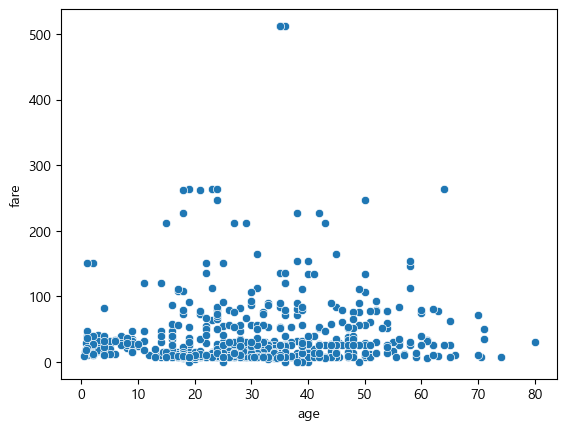

In [33]:
sns.scatterplot(titanic, x='age', y='fare')

### 수치 데이터간의 상관관계

In [34]:
titanic.select_dtypes(np.number).head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [35]:
titanic.select_dtypes(np.number).corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


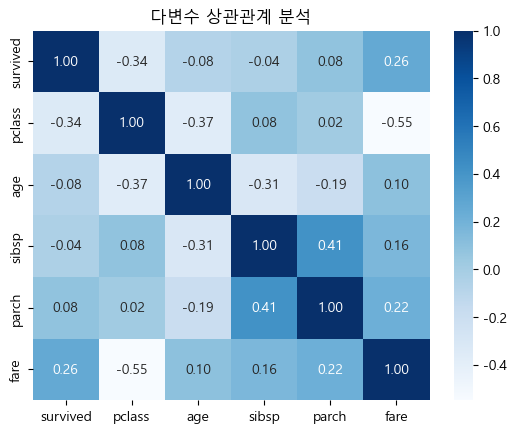

In [60]:
sns.heatmap(titanic.select_dtypes(np.number).corr(),
            annot=True,
            cmap='Blues',
            fmt='.2f'
           )
plt.title('다변수 상관관계 분석')
plt.show()

### 라인 그래프

<Axes: xlabel='class', ylabel='fare'>

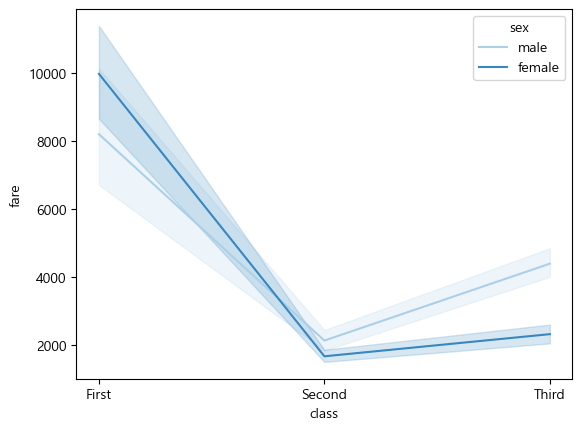

In [45]:
# 각 클래스에 따른 운임의 평균
sns.lineplot(titanic, x='class', y='fare', estimator='sum', hue='sex', palette='Blues')

### 박스 플롯

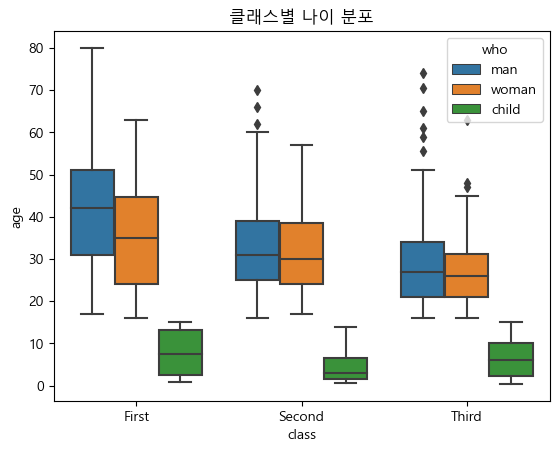

In [55]:
# 각 클래스에 따른 나이 분포
sns.boxplot(titanic, x='class', y='age', hue='who')
plt.title('클래스별 나이 분포')
plt.show()

### 바이올린플롯

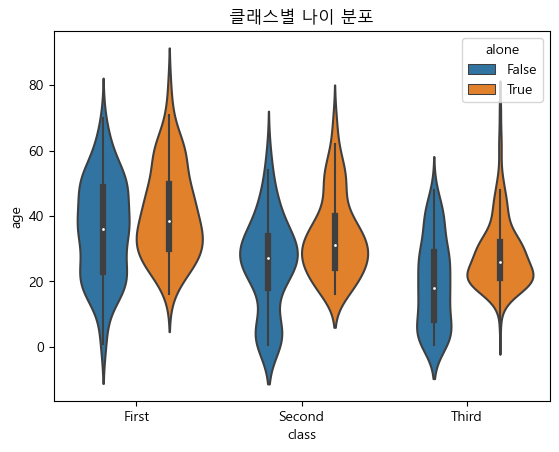

In [57]:
# 각 클래스에 따른 나이 분포
sns.violinplot(titanic, x='class', y='age', hue='alone')
plt.title('클래스별 나이 분포')
plt.show()

### 카운트 플롯

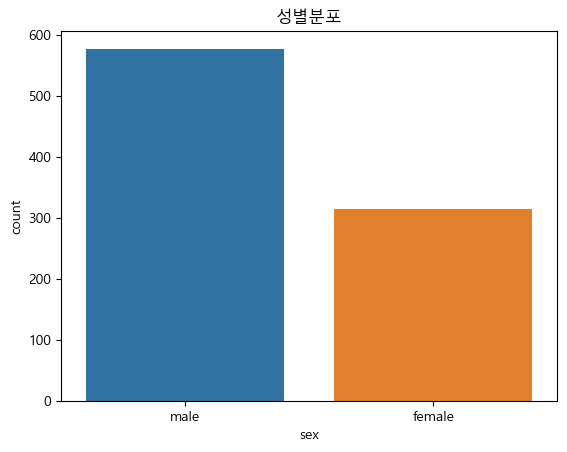

In [58]:
# 탑승객 성별 분포
sns.countplot(titanic, x='sex')
plt.title('성별분포')
plt.show()

In [59]:
titanic['alone'].value_counts(normalize=True)*100

alone
True     60.26936
False    39.73064
Name: proportion, dtype: float64

### 페어 플롯

D:\kdit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


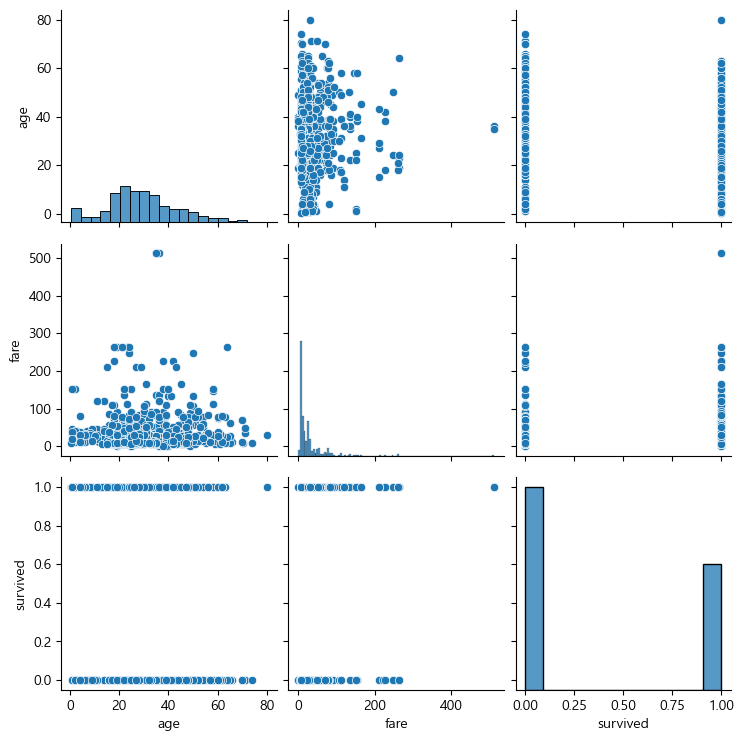

In [66]:
# age, fare, survied 변수간의 관계 표현
sns.pairplot(titanic[['age', 'fare' ,'survived']])
plt.subplots_adjust(hspace=.1)

### 조인트 플롯 (scatterplot-흩어진정도 + histplot-밀집구간)

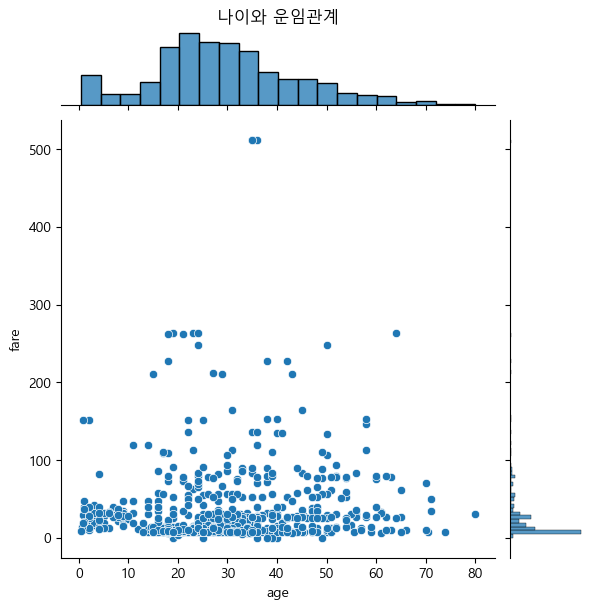

In [79]:
# 나이(age)와 운임(fare) 관계 표현
sns.jointplot(titanic, x='age', y='fare')
plt.title('나이와 운임관계', pad=70)
plt.show()

### 스웜 플롯
1. 데이터포인트 중복 방지
2. 정략적 정보표현
3. 데이터 밀집도표현

<Axes: xlabel='sex', ylabel='age'>

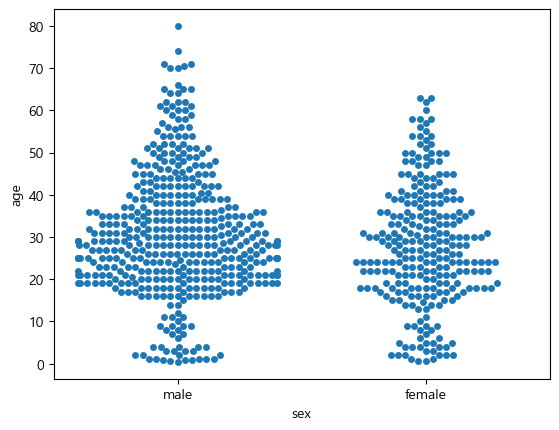

In [80]:
# 성별(sex)에 따른 나이(age) 분포
sns.swarmplot(titanic, x='sex', y='age')

### 스트립 플롯
1. 개별 데이터 포인트 표시
2. 범주형 데이터 시각화
3. 데이터 중복 표현 - 동일값은 겹쳐서 표시

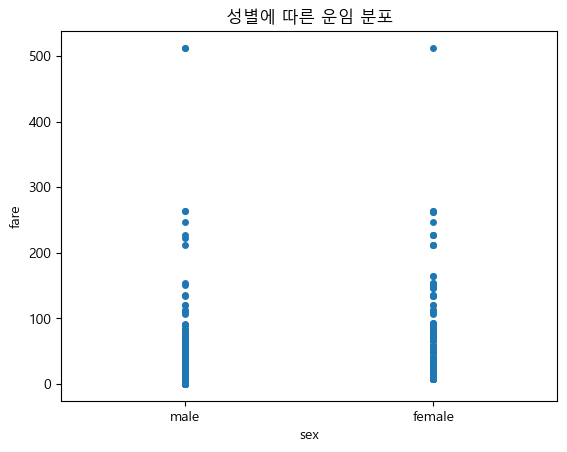

In [83]:
# 성별에 따른 운임분포
# jitter : 데이터 포인트들 사이의 겹침을 줄이기 위해 사용함, 데이터 포인트가 많을 때 사용
sns.stripplot(titanic, x='sex', y='fare', jitter=False)
plt.title('성별에 따른 운임 분포')
plt.show()

### 팩트 그리드
1. 다변량 데이터 시각화
2. 조건부 플로팅

D:\kdit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


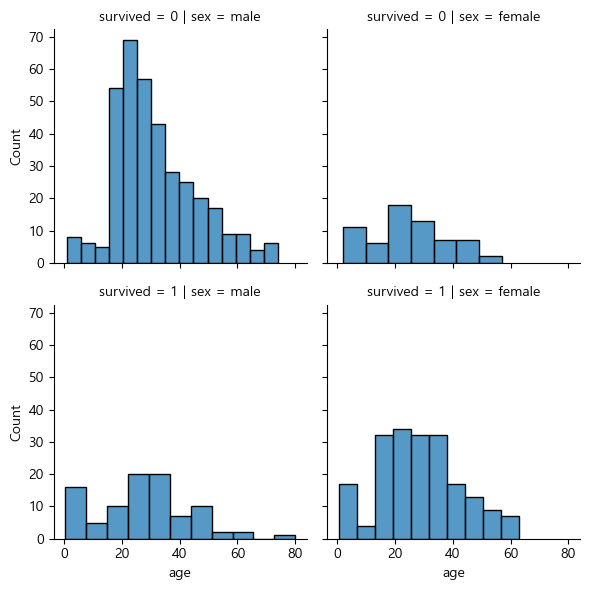

In [86]:
# 생존여부(survived)에 따른 나이(age) 분포
g = sns.FacetGrid(titanic, col='sex', row='survived')
g.map(sns.histplot, 'age')
plt.show()

### 레크 플롯

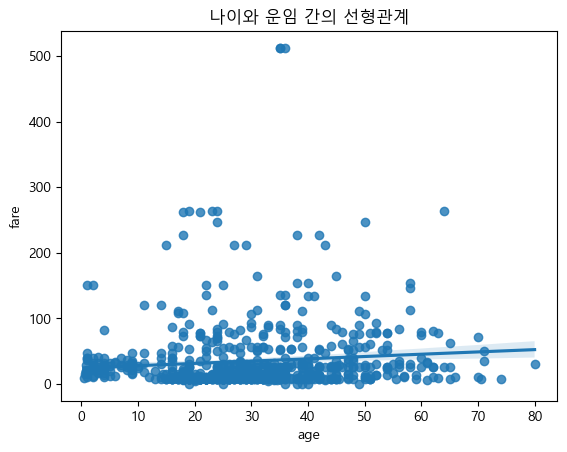

In [87]:
# 나이와 운임간의 선형관계 표현
sns.regplot(titanic, x='age', y='fare')
plt.title('나이와 운임 간의 선형관계')
plt.show()